# Importação de Biblioteca e Data Frame

In [13]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv"
caminho_csv = "consumo_alcool.csv"

resposta = requests.get(download_url)
resposta.raise_for_status()
with open(caminho_csv, "wb") as n:
    n.write(resposta.content)
print("Download Concluido.")




Download Concluido.


In [14]:
import pandas as pd

alcool = pd.read_csv("consumo_alcool.csv")






In [15]:
type(alcool)

pandas.core.frame.DataFrame

# Informações do DF


In [16]:
alcool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [17]:
alcool.shape

(193, 5)

In [18]:
alcool.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [19]:
alcool.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [20]:
alcool.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5
192,Zimbabwe,64,18,4,4.7


In [ ]:
alcool.dropna(axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [ ]:
alcool.isnull()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
188,False,False,False,False,False
189,False,False,False,False,False
190,False,False,False,False,False
191,False,False,False,False,False


In [ ]:
alcool.fillna(0, inplace=True)
alcool.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [ ]:
alcool.iloc[106]

Series([], Name: Marshall Islands, dtype: float64)

In [ ]:
alcool[alcool['country'] == 'Brazil']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
23,Brazil,245,145,16,7.2


In [ ]:
alcool.loc[1:120]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
...,...,...,...,...,...
116,Myanmar,5,1,0,0.1
117,Namibia,376,3,1,6.8
118,Nauru,49,0,8,1.0
119,Nepal,5,6,0,0.2


In [ ]:
alcool[(alcool['beer_servings'] > 100) & (alcool['total_litres_of_pure_alcohol'] > 12.0)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
3,Andorra,245,138,312,12.4
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9


In [ ]:
alcool.where(alcool['total_litres_of_pure_alcohol'] > 5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,100.0,3.0,7.7
189,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN


# Países cujo o consumo de litros de alcool seja maior que 6.0



In [ ]:
alcool.query('total_litres_of_pure_alcohol > 6.0')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
3,Andorra,245,138,312,12.4
6,Argentina,193,25,221,8.3
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7
11,Bahamas,122,176,51,6.3
...,...,...,...,...,...
180,Ukraine,206,237,45,8.9
182,United Kingdom,219,126,195,10.4
184,USA,249,158,84,8.7
185,Uruguay,115,35,220,6.6


In [ ]:
pd.cut(alcool['total_litres_of_pure_alcohol'],bins=3)

0      (-0.0144, 4.8]
1          (4.8, 9.6]
2      (-0.0144, 4.8]
3         (9.6, 14.4]
4          (4.8, 9.6]
            ...      
188        (4.8, 9.6]
189    (-0.0144, 4.8]
190    (-0.0144, 4.8]
191    (-0.0144, 4.8]
192    (-0.0144, 4.8]
Name: total_litres_of_pure_alcohol, Length: 193, dtype: category
Categories (3, interval[float64]): [(-0.0144, 4.8] < (4.8, 9.6] < (9.6, 14.4]]

# Gráfico de consumo de alcool


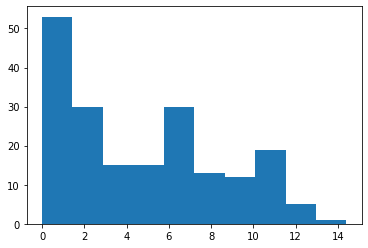

In [22]:
litros = alcool['total_litres_of_pure_alcohol']

plt.hist(litros)

plt.show()

# Países que consomem mais Alcool

Percebe-se que na grande maioria não passam de 3.0

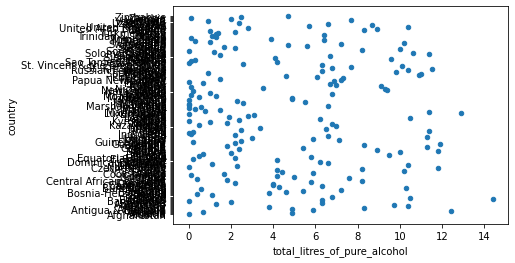

In [23]:
alcool.plot(x='total_litres_of_pure_alcohol', y='country', kind='scatter')
plt.show()

# Relação aos países que consomem mais cerveja

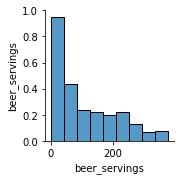

In [26]:
sns.pairplot(alcool.loc[:,'country':'beer_servings'])
plt.show()